In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


### Outlier Detection

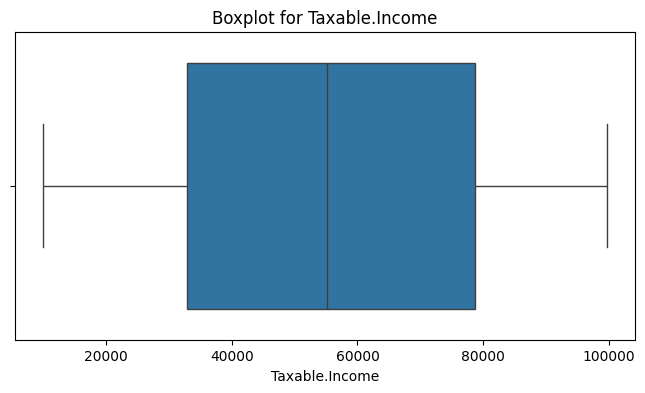

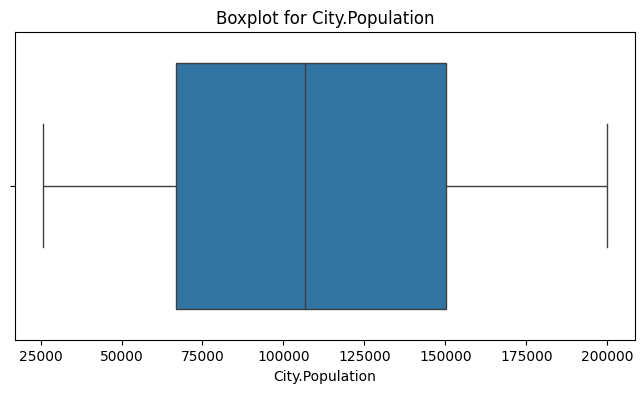

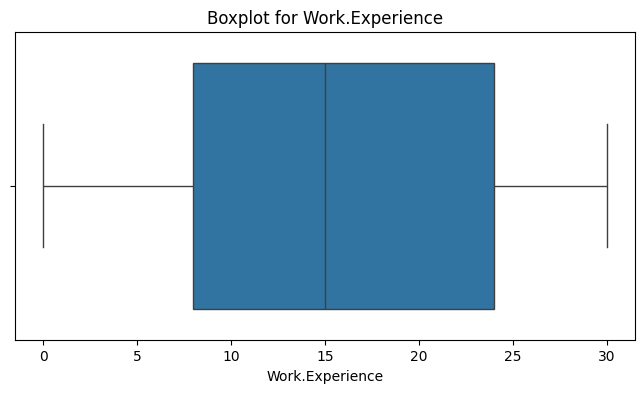

In [8]:
numerical_features = df.select_dtypes(include='number').columns

for column in numerical_features:
    plt.figure(figsize=(8,4))  # Optional: Set the figure size
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

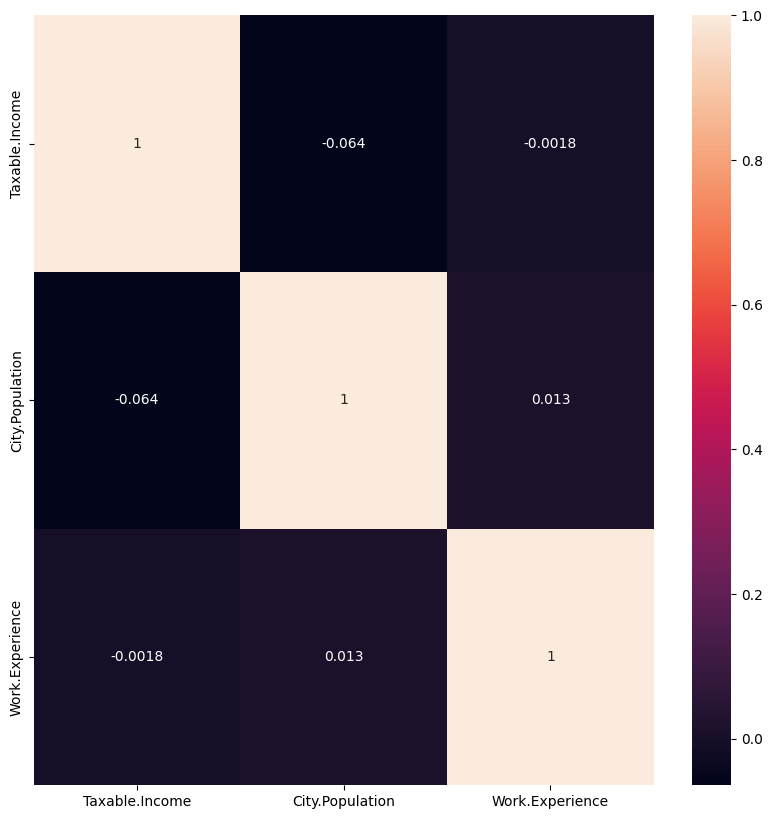

In [9]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Visualization

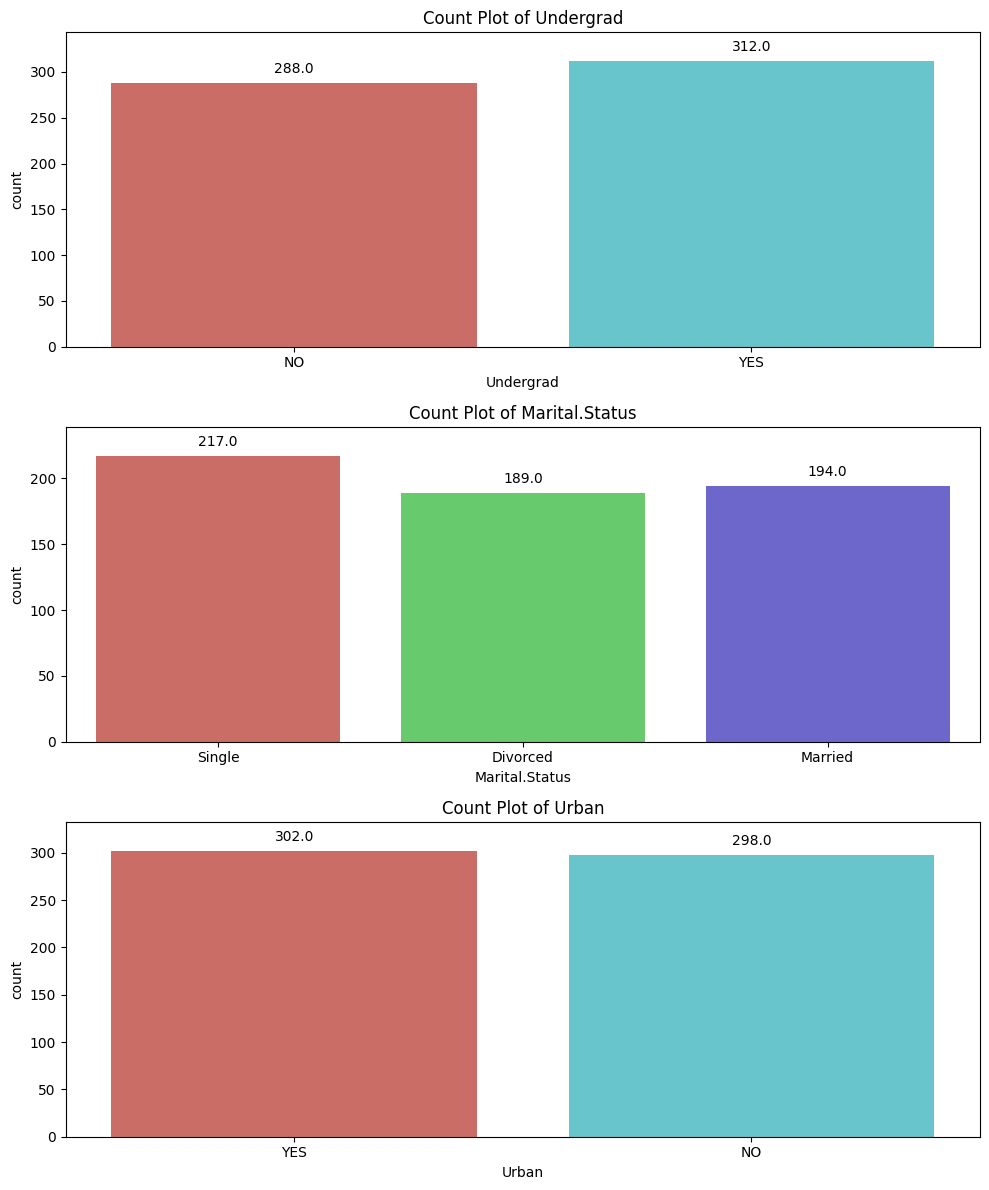

In [10]:
# Constructing count plot fot categorical columns
categorical_featutes = df.select_dtypes(include=['object', 'category']).columns

# Set up subplots based on the number of columns
fig, axes = plt.subplots(nrows=len(categorical_featutes), ncols=1, figsize=(10, len(categorical_featutes) * 4))

# Iterate through each feature and create a count plot
for i, feature in enumerate(categorical_featutes):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='hls')
    axes[i].set_title(f'Count Plot of {feature}')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[feature].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()

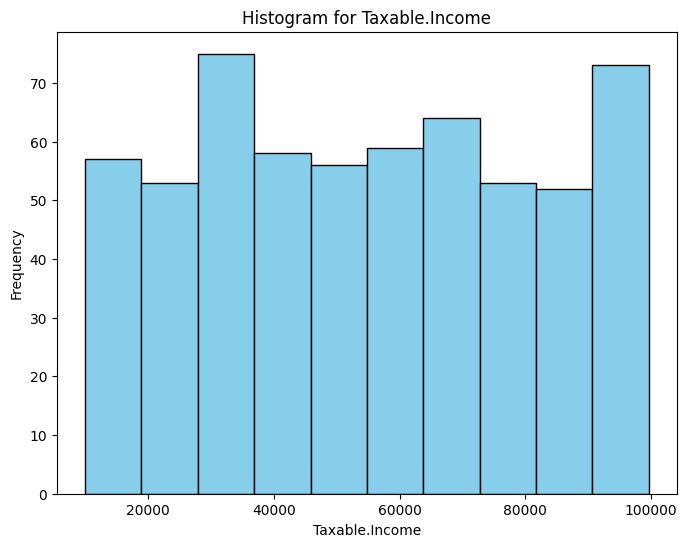

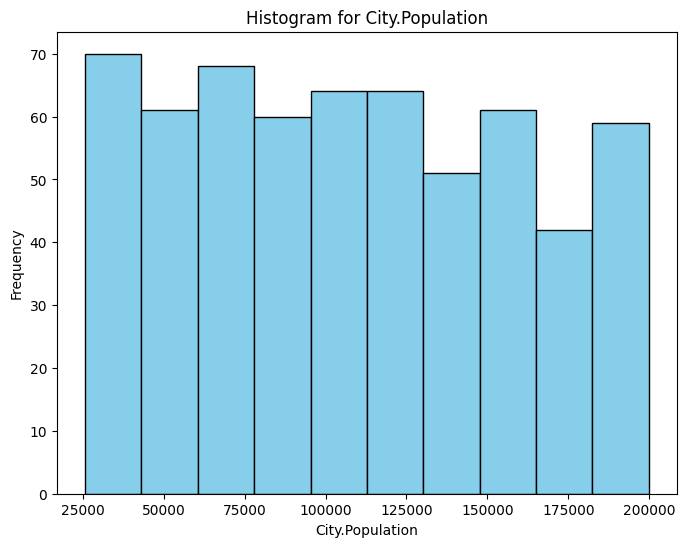

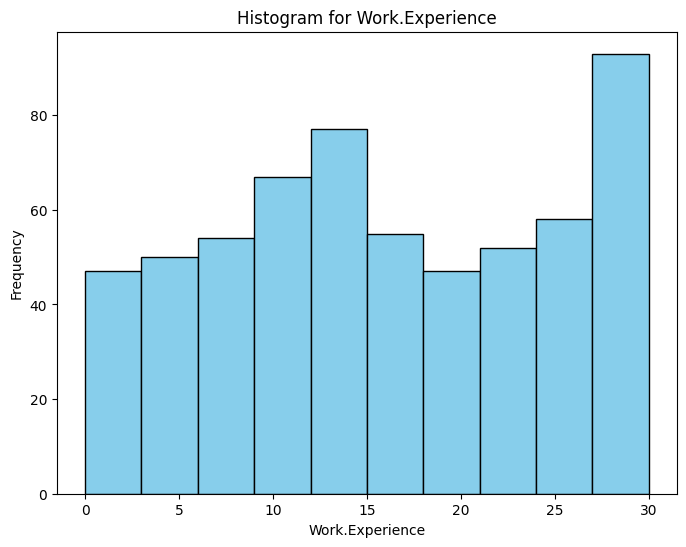

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

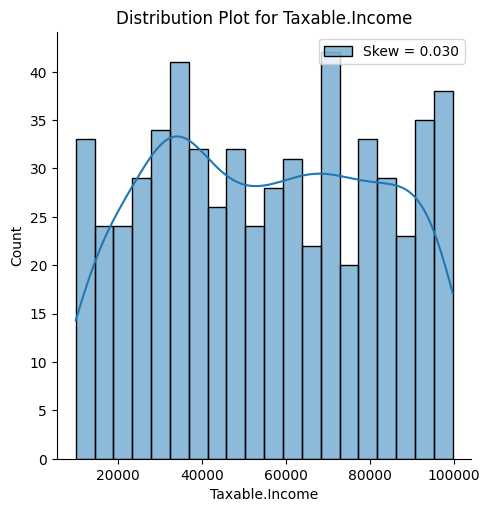

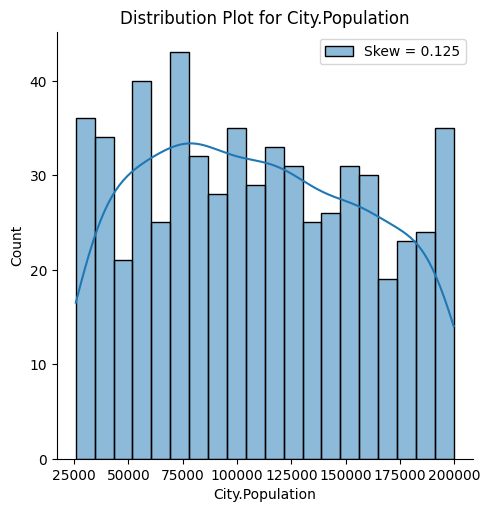

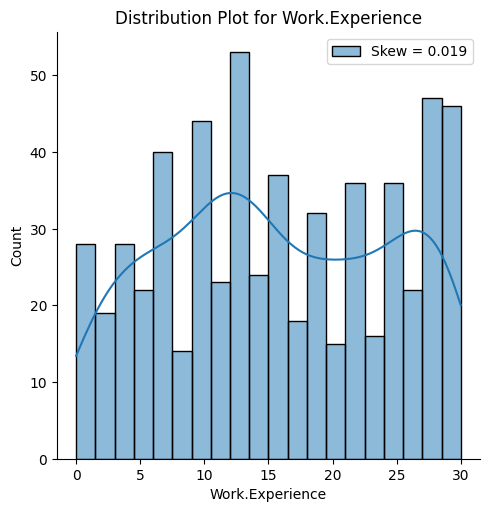

In [12]:
# Distribution plot for all numerical features
numerical_features = df.select_dtypes(include='number').columns

for feature in numerical_features:
    skew = df[feature].skew()
    sns.displot(df[feature], kde= True, label='Skew = %.3f' %(skew), bins=20)
    plt.legend(loc='best')
    plt.title(f'Distribution Plot for {feature}')
    plt.show()

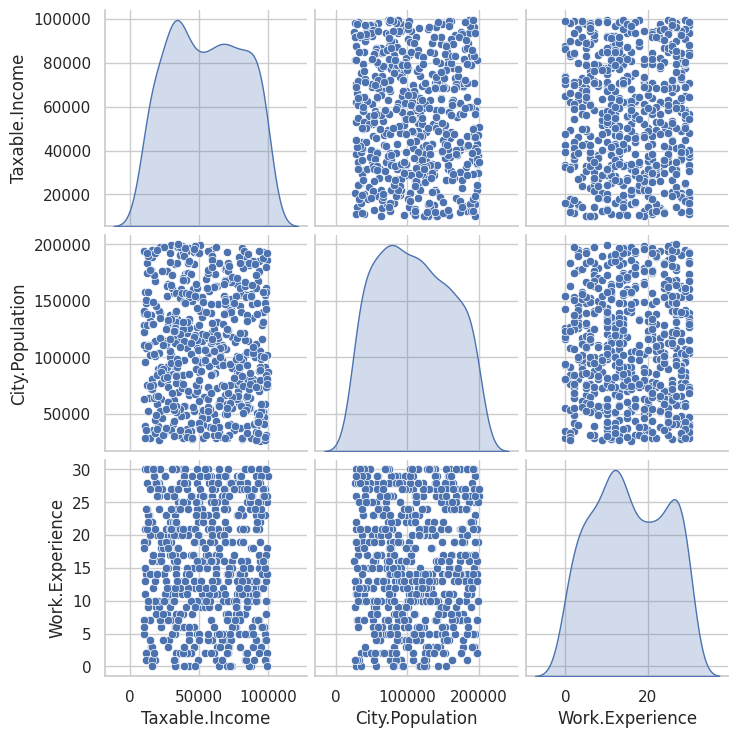

In [13]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind="kde")
plt.show()

# Data Preprocessing

In [14]:
import pandas as pd
df['Taxable.Income'] = df['Taxable.Income'].map(lambda x: 'Risky' if x <= 30000 else 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


Converted the 'Taxable.Income' variable from numerical to categorical, categorizing observations as '**Risky**' if the value <=30000 and as '**Good**' if the value > 30000.

In [15]:
# Label encoding the categorical features
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Undergrad'] = LE.fit_transform(df['Undergrad'])
df['Marital.Status'] = LE.fit_transform(df['Marital.Status'])
df['Taxable.Income'] = LE.fit_transform(df['Taxable.Income'])
df['Urban'] = LE.fit_transform(df['Urban'])

## Splitting the data as X and Y

In [16]:
X = df.drop('Taxable.Income', axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
Y = df['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

## Data Partition

In [18]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# Building Decision Tree Classifier using **Entropy** Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

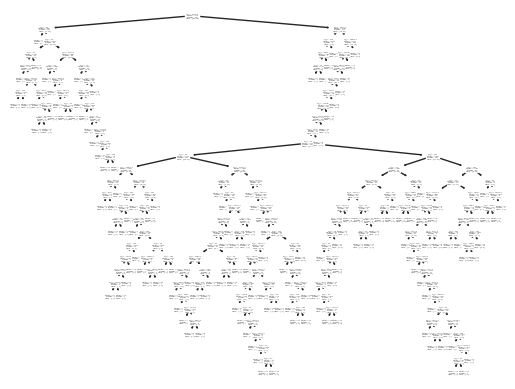

In [20]:
#PLot the decision tree
tree.plot_tree(model);

In [21]:
colnames = list(X_train.columns)
colnames

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

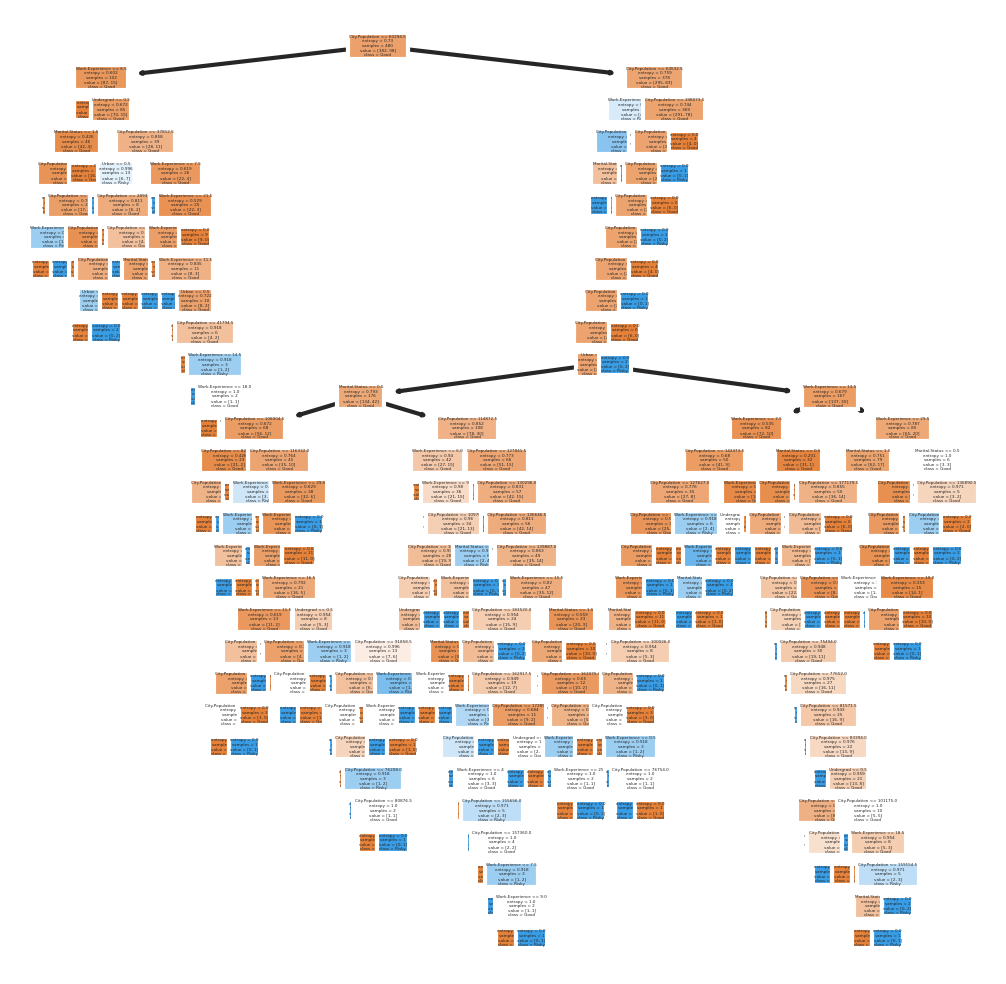

In [22]:
fn=colnames
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [23]:
text = tree.export_text(model)
print(text)

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 6.50
|   |   |--- class: 0
|   |--- feature_3 >  6.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 34470.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  34470.00
|   |   |   |   |   |--- feature_2 <= 36489.50
|   |   |   |   |   |   |--- feature_3 <= 11.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  11.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  36489.50
|   |   |   |   |   |   |--- feature_2 <= 51961.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  51961.50
|   |   |   |   |   |   |   |--- feature_2 <= 54407.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   

In [24]:
model.feature_importances_

array([0.04151765, 0.08929149, 0.5691259 , 0.26519454, 0.03487041])

In [25]:
# Important Features
import pandas as pd
feature_imp = pd.Series(model.feature_importances_, index = fn).sort_values(ascending = False)
feature_imp

City.Population    0.569126
Work.Experience    0.265195
Marital.Status     0.089291
Undergrad          0.041518
Urban              0.034870
dtype: float64

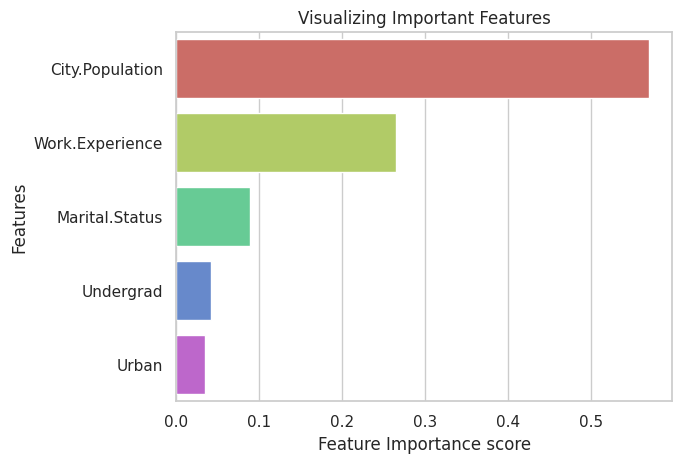

In [26]:
# Visualizing Important Features
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp, y = feature_imp.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

From the above barplot we can conclude that "**City.Population**" is the most important feature.

## Training Predictions

In [27]:
# predictions on train Data
pred_train = model.predict(X_train)
pd.Series(pred_train).value_counts()

0    382
1     98
dtype: int64

In [28]:
# training predictions
pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
train_pred = pd.DataFrame({'Actual':Y_train, 'Predicted':pred_train})
train_pred

,Actual,Predicted
145,0,0
9,0,0
375,0,0
523,0,0
188,1,1
...,...,...
71,0,0
106,1,1
270,0,0
435,0,0


In [30]:
pd.crosstab(Y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,382,0
1,0,98


In [31]:
# Training Accuracy
print(' Training Accuracy:',np.mean(pred_train == Y_train).round(3))

 Training Accuracy: 1.0


## Test Predictions

In [32]:
#Predicting on test data
pred_test = model.predict(X_test) # predicting on test data set
pd.Series(pred_test).value_counts() # getting the count of each category

0    94
1    26
dtype: int64

In [33]:
pred_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [34]:
test_pred = pd.DataFrame({'Actual':Y_test, 'Predicted':pred_test})
test_pred

,Actual,Predicted
110,1,0
419,0,1
565,0,0
77,0,0
181,1,1
...,...,...
399,0,1
340,0,1
148,0,0
494,0,0


In [35]:
pd.crosstab(Y_test,pred_test) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,74,20
1,20,6


In [36]:
# Accuracy
print(' Test Accuracy:',np.mean(pred_test == Y_test).round(3))

 Test Accuracy: 0.667


## Evaluating model performance with **Cross-Validation**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')

In [39]:
training_accuracy = []
test_accuracy = []

for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 1.0
Average test accuracy: 0.644


#            

# Building Decision Tree Classifier using **Gini** Criteria

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

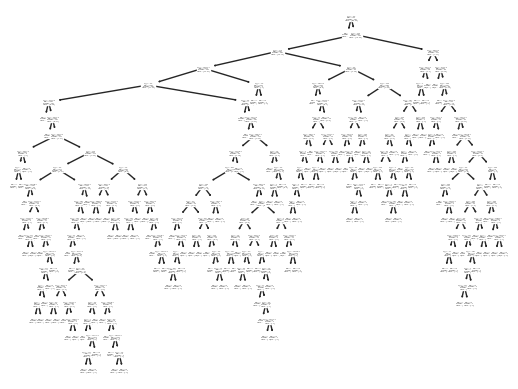

In [41]:
#PLot the decision tree
tree.plot_tree(model_gini);

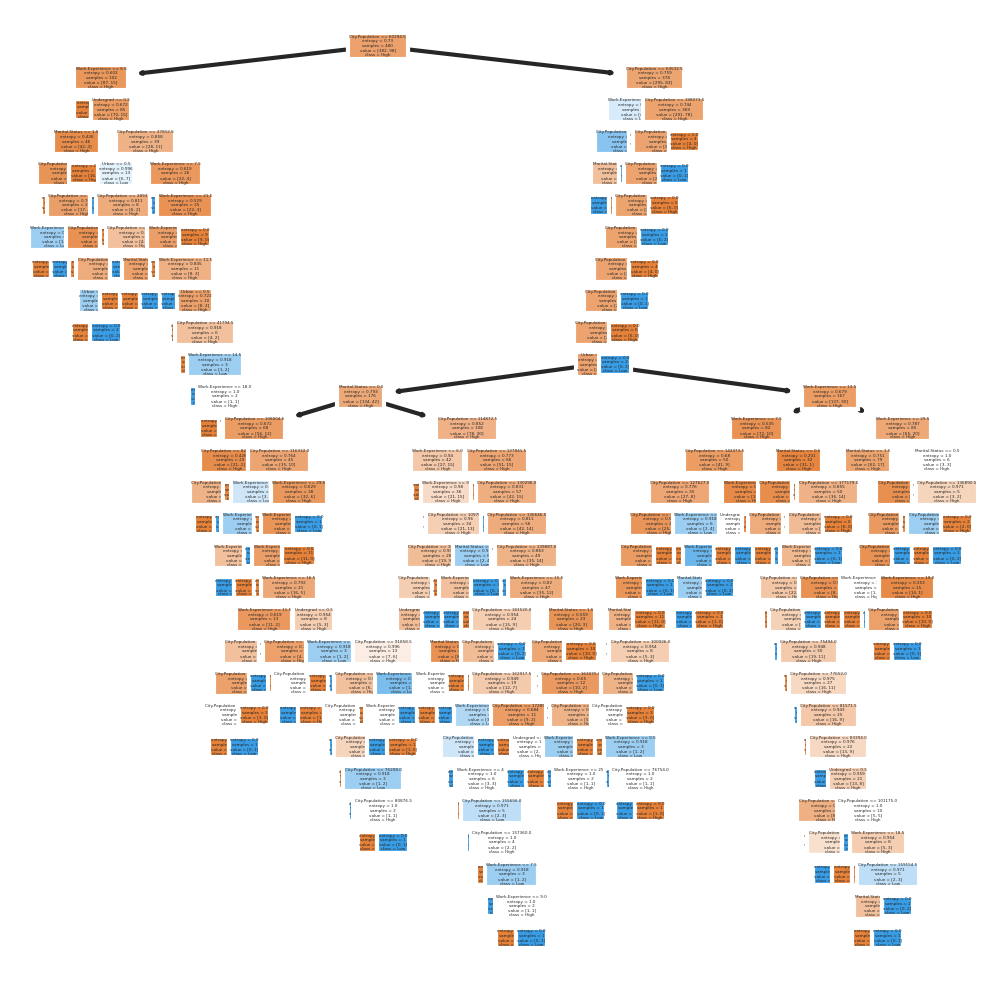

In [42]:
fn=colnames
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [43]:
text = tree.export_text(model_gini)
print(text)

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_3 <= 24.50
|   |   |--- feature_3 <= 17.50
|   |   |   |--- feature_2 <= 197770.00
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_2 <= 27344.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  27344.50
|   |   |   |   |   |   |--- feature_2 <= 32282.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  32282.00
|   |   |   |   |   |   |   |--- feature_2 <= 39943.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 35222.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  35222.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  39943.00
|   |   |   |   |

In [44]:
#Prediction and computing the accuracy
pred_test=model_gini.predict(X_test)
print('Test Accuracy :',np.mean(pred_test==Y_test))

Test Accuracy : 0.6583333333333333


In [45]:
model_gini.feature_importances_

array([0.06515274, 0.11200659, 0.59767444, 0.20682574, 0.01834049])

In [46]:
# Important Features
import pandas as pd
feature_imp_gini = pd.Series(model_gini.feature_importances_, index = fn).sort_values(ascending = False)
feature_imp_gini

City.Population    0.597674
Work.Experience    0.206826
Marital.Status     0.112007
Undergrad          0.065153
Urban              0.018340
dtype: float64

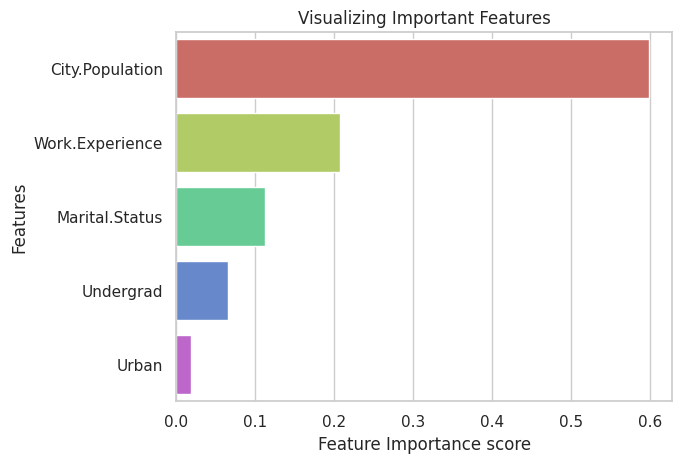

In [47]:
# Visualizing Important Features
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp_gini, y = feature_imp_gini.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

From the above barplot we can conclude that "**City.Population**" is the most important feature.

## Training Predictions

In [48]:
# predictions on train Data
pred_train = model_gini.predict(X_train)
pd.Series(pred_train).value_counts()

0    384
1     96
dtype: int64

In [49]:
# training predictions
pred_train

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [50]:
train_pred = pd.DataFrame({'Actual':Y_train, 'Predicted':pred_train})
train_pred

,Actual,Predicted
6,0,0
429,0,0
51,0,0
247,1,1
374,0,0
...,...,...
348,0,0
350,0,0
251,0,0
71,0,0


In [51]:
pd.crosstab(Y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,384,0
1,0,96


In [52]:
# Training Accuracy
print(' Training Accuracy:',np.mean(pred_train == Y_train).round(3))

 Training Accuracy: 1.0


## Test Predictions

In [53]:
#Predicting on test data
pred_test = model_gini.predict(X_test) # predicting on test data set
pd.Series(pred_test).value_counts() # getting the count of each category

0    97
1    23
dtype: int64

In [54]:
pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [55]:
test_pred = pd.DataFrame({'Actual':Y_test, 'Predicted':pred_test})
test_pred

,Actual,Predicted
438,1,0
346,1,0
486,0,0
136,0,0
481,0,0
...,...,...
285,0,0
26,0,0
509,1,0
21,1,0


In [56]:
pd.crosstab(Y_test,pred_test) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,74,18
1,23,5


In [57]:
# Accuracy
print(' Test Accuracy:',np.mean(pred_test == Y_test).round(3))

 Test Accuracy: 0.658


In [58]:
# Accuracy
print(' Test Accuracy:',accuracy_score(pred_test,Y_test).round(3))

 Test Accuracy: 0.658


## Evaluating the model performance with **Cross-Validation**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

In [61]:
training_accuracy = []
test_accuracy = []

for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 1.0
Average test accuracy: 0.639


# **Conclusion**

## The training set demonstrates flawless accuracy of **100%** with and without cross-validation for both the **Entropy** and **Gini** criteria in Decision trees. However, the accuracy of the model when evaluating it on test data without cross-validation is around **65%** for the Gini Decision Tree and **69%** for the Entropy decision tree. With Cross-Validation, the test accuracy diminishes to around **64%** for both decision trees.